In [15]:
import numpy as np
import pandas as pd
import torch
from torch.autograd import Variable
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [16]:
train_df = pd.read_csv("./data/train_df.csv", index_col=0)
val_df = pd.read_csv("./data/validation_df.csv", index_col=0)
test_df = pd.read_csv("./data/test_df.csv", index_col=0)

In [35]:
train_df.D.value_counts()
#test_df.D.value_counts()
#val_df.D.value_counts()

D
1    31814
0    31691
Name: count, dtype: int64

In [18]:
train_df['OLIG_PROTE_CD'].unique()

array([1., 2., 3., 4., 5., 6.])

In [19]:
train_df['liver'] = np.where(train_df['SGPT_ALT'] > 40, 1, 0)
train_df['obesity'] = np.where(train_df['BMI']>30, 1, 0)
train_df['Hypertension'] = np.where(train_df['BP_LWST'] >= 90, 1, 0)

In [20]:
data = train_df.drop(['BLDS', 'D'], axis=1)
target = train_df['D']

In [21]:
data.head()

,SEX,AGE_GROUP,BP_LWST,TRIGLYCERIDE,HDL_CHOLE,LDL_CHOLE,HMG,OLIG_PROTE_CD,CREATININE,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD,BMI,liver,obesity,Hypertension
0,2,13,71.0,82.0,69.0,117.0,14.0,1.0,0.0,16.0,14.0,1.0,22.892820,0,0,0
1,1,15,80.0,77.0,51.0,77.0,15.0,1.0,1.0,25.0,30.0,2.0,20.202020,0,0,0
2,2,11,68.0,57.0,55.0,127.0,12.0,1.0,0.0,16.0,19.0,1.0,20.811655,0,0,0
3,1,15,82.0,51.0,66.0,152.0,13.0,1.0,1.0,16.0,14.0,1.0,20.202020,0,0,0
4,2,15,66.0,161.0,53.0,65.0,13.0,1.0,0.0,16.0,27.0,1.0,26.666667,0,0,0


In [34]:
data['obesity'].value_counts()

obesity
0    59252
1     4253
Name: count, dtype: int64

In [22]:
target.head()

0    0
1    1
2    0
3    0
4    1
Name: D, dtype: int64

In [23]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score


X_train, X_test, y_train, y_test = train_test_split(data, target ,test_size=0.1)
xgb_model = xgboost.XGBClassifier(n_estimators=800, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=0.8, max_depth=7)

print(len(X_train), len(X_test))
xgb_model.fit(X_train,y_train)

57154 6351


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

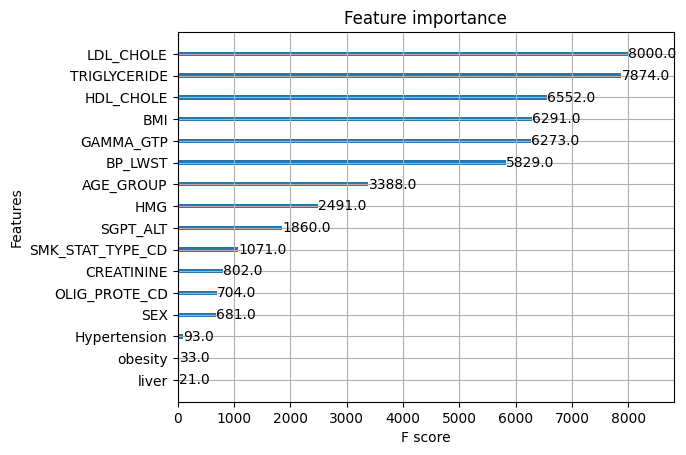

In [24]:
xgboost.plot_importance(xgb_model)

In [25]:
predictions = xgb_model.predict(X_test)
predictions

array([1, 0, 0, ..., 1, 0, 0])

In [26]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions,y_test))

0.992493963677083
0.792153689635704


In [27]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


In [28]:
'''
clf = MLPClassifier(solver = "adam", hidden_layer_sizes = 100, random_state = 1)
clf.fit(X_train,y_train)
clf.predict(X_test)
r_sq = clf.score(X_train,y_train)
print(r_sq)
'''

'\nclf = MLPClassifier(solver = "adam", hidden_layer_sizes = 100, random_state = 1)\nclf.fit(X_train,y_train)\nclf.predict(X_test)\nr_sq = clf.score(X_train,y_train)\nprint(r_sq)\n'

In [29]:
len(predictions)
len(y_test)

6351

In [30]:
cm = confusion_matrix(y_test, predictions)
print(cm)

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, predictions)

# Calculate the precision.
precision = metrics.precision_score(y_test, predictions)

# Calculate the recall.
recall = metrics.recall_score(y_test, predictions)

# Calculate the F1 score.
f1_score = metrics.f1_score(y_test, predictions)

# Print the results.
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

[[3143   48]
 [ 289 2871]]
Accuracy: 0.9469374901590301
Precision: 0.9835560123329907
Recall: 0.9085443037974683
F1 score: 0.9445632505346273


In [31]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9998 entries, 63534 to 73533
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BLDS              9998 non-null   float64
 1   SEX               9998 non-null   int64  
 2   AGE_GROUP         9998 non-null   int64  
 3   BP_LWST           9998 non-null   float64
 4   TRIGLYCERIDE      9998 non-null   float64
 5   HDL_CHOLE         9998 non-null   float64
 6   LDL_CHOLE         9998 non-null   float64
 7   HMG               9998 non-null   float64
 8   OLIG_PROTE_CD     9998 non-null   float64
 9   CREATININE        9998 non-null   float64
 10  SGPT_ALT          9998 non-null   float64
 11  GAMMA_GTP         9998 non-null   float64
 12  SMK_STAT_TYPE_CD  9998 non-null   float64
 13  D                 9998 non-null   int64  
 14  BMI               9998 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.2 MB


In [32]:
val_df['D'].value_counts()

D
0    5067
1    4931
Name: count, dtype: int64

In [33]:
val_target = val_df['D']
val_target

63534    0
63535    1
63536    1
63537    0
63538    1
        ..
73529    0
73530    1
73531    1
73532    0
73533    0
Name: D, Length: 9998, dtype: int64

<Axes: >

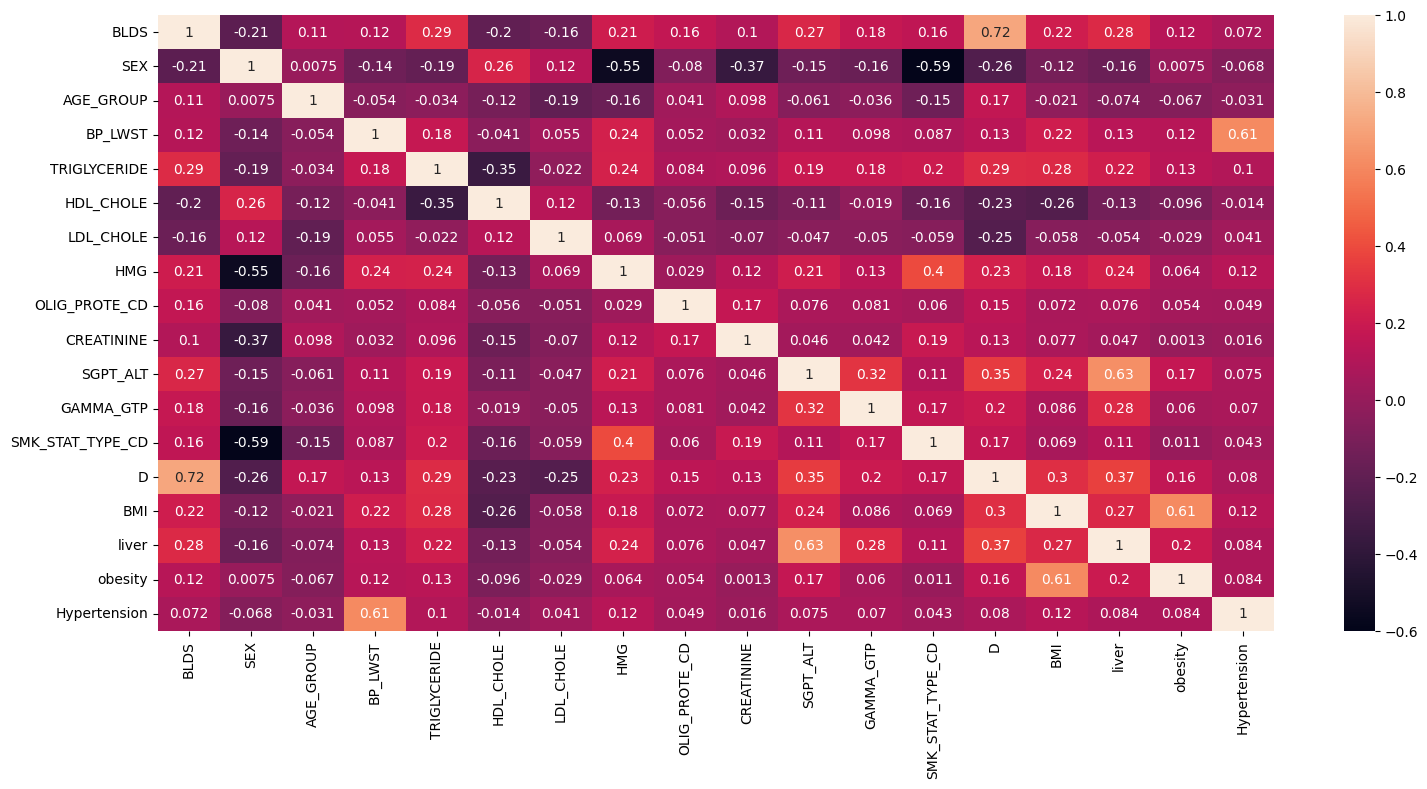

In [37]:
import seaborn as sns
plt.figure(figsize=(18,8))
corr = train_df.corr()
#print(corr)
sns.heatmap(corr, annot=True, square=False, vmin=-0.6, vmax=1.0)